# Intro

Goal of this notebook: 
- familiarising myself with gamma parametrisation. 

In [51]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.linear_model import GammaRegressor


# Gamma Summary

For reference: https://en.wikipedia.org/wiki/Gamma_distribution.

The numpy package's shape and scale parameter are the first parameter set, so $k$ and $\theta$. Mean is $k \theta$. 

# Generate Data

In [34]:
shape = 4
scale = 10000
n1 = 10000

In [35]:
# df1: simple simulated Poisson
df1 = pd.DataFrame.from_dict({'target': np.random.gamma(shape, scale, n1)})

# Visualisation

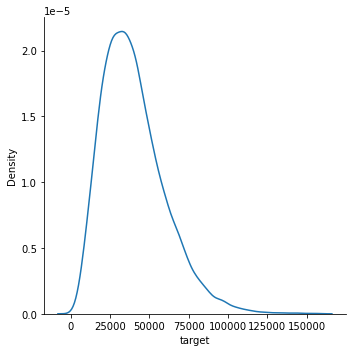

In [36]:
sns.displot(df1.target, kind = 'kde')
plt.show()

# Distribution Fitting

## Method of Moments

The formula is quite simple, based on observed variance and mean. 

In [37]:
np.mean(df1.target)

40075.16561970907

In [40]:
(np.std(df1.target)) ** 2

399487287.52669764

In [38]:
estimated_shape = np.mean(df1.target) **  2 / (np.std(df1.target)) ** 2
estimated_shape

4.020200265671237

In [39]:
estimated_scale = (np.std(df1.target)) ** 2 / np.mean(df1.target)
estimated_scale

9968.450069991195

In [41]:
estimated_mean = estimated_shape * estimated_scale
estimated_mean

40075.16561970906

In [42]:
estimated_variance = estimated_shape * estimated_scale ** 2
estimated_variance

399487287.5266975

OK, so this method seems to work. 

However, this is not the MLE estimation, MLE should be biased for gamma. 

## Maximum Likelihood Estimation

https://en.wikipedia.org/wiki/Gamma_distribution#Maximum_likelihood_estimation

There is no closed formula, just an approximation. 

In [43]:
def get_gamma_mle_scale(mle_shape, sample):
    # returns the estimated scale parameter, which is dependent on the estimated shape
    return np.mean(sample) / mle_shape

def get_gamma_approximate_mle_shape(sample):
    # returns an approximation of shape parameter
    s = np.log(np.mean(sample)) - np.mean(np.log(sample))
    return (3 - s + ((s-3)**2 + 24 * s) ** 0.5) / (12 * s)

In [44]:
mle_estimated_shape = get_gamma_approximate_mle_shape(df1.target)
mle_estimated_shape

3.9704464373742985

In [45]:
mle_estimated_scale = get_gamma_mle_scale(mle_estimated_shape, df1.target)
mle_estimated_scale

10093.365129542268

In [46]:
mle_estimated_shape * mle_estimated_scale

40075.16561970907

OK, so we get the expected value right, just not the shape parameter itself. 

# GLM

Let's see if we can fit the expected value. 

In [52]:
df1['dummy_feature'] = 1

In [54]:
mdl = GammaRegressor(alpha = 0)

In [56]:
mdl.fit(df1[['dummy_feature']], df1['target'])

GammaRegressor(alpha=0)

In [58]:
df1['pred'] = mdl.predict(df1[['dummy_feature']])

In [59]:
df1.pred[0]

40075.16561970897